In [44]:
import pandas as pd

# Load the dataset
file_path = "~/Downloads/heart_attack_prediction_dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nDataset Head:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Handle missing values
# For demonstration purposes, let's drop rows with missing values
df.dropna(inplace=True)




Dataset Shape: (8763, 26)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# List of numerical columns
numerical_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 
                     'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 
                     'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 
                     'Sleep Hours Per Day']

# Ensure numerical columns are numeric
for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect and print outliers for each numerical column
for column in numerical_columns:
    outliers = detect_outliers(df, column)
    print(f'Outliers in {column}:')
    print(outliers)


Outliers in Age:
Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]
Outliers in Cholesterol:
Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]
Outliers in Blood Pressure:
Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood P

In [45]:
categorical_columns = ['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']

for column in categorical_columns:
    print(f'Value counts for {column}:')
    print(df[column].value_counts())
    print()


Value counts for Sex:
Male      6111
Female    2652
Name: Sex, dtype: int64

Value counts for Diet:
Healthy      2960
Average      2912
Unhealthy    2891
Name: Diet, dtype: int64

Value counts for Country:
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: Country, dtype: int64

Value counts for Continent:
Asia             2543
Europe           2241
South America    1362
Australia         884
Africa            873
North America     860
Name: Continent, dtype: int64

Value counts for Hemisphere:
Northern Hemisphere    5660
Southern Hemisphere    3103
Name: Hemisphere, dtype: int64



In [68]:
# Example check: Age should be positive
if (df['Age'] < 0).any():
    print("Inconsistent Age values found.")

# Example check: Heart Rate should be within a reasonable range
if (df['Heart Rate'] < 30).any() or (df['Heart Rate'] > 220).any():
    print("Inconsistent Heart Rate values found.")


In [50]:
# Remove rows with negative Age
data = df[df['Age'] >= 0]

# Remove rows with unrealistic Heart Rate values
data = df[(df['Heart Rate'] >= 30) & (data['Heart Rate'] <= 220)]

# Verify the cleaned data
print(df.describe(include='all'))


       Patient ID          Age   Sex  Cholesterol Blood Pressure   Heart Rate  \
count        8763  8763.000000  8763  8763.000000           8763  8763.000000   
unique       8763          NaN     2          NaN           3915          NaN   
top       BMW7812          NaN  Male          NaN         146/94          NaN   
freq            1          NaN  6111          NaN              8          NaN   
mean          NaN    53.707977   NaN   259.877211            NaN    75.021682   
std           NaN    21.249509   NaN    80.863276            NaN    20.550948   
min           NaN    18.000000   NaN   120.000000            NaN    40.000000   
25%           NaN    35.000000   NaN   192.000000            NaN    57.000000   
50%           NaN    54.000000   NaN   259.000000            NaN    75.000000   
75%           NaN    72.000000   NaN   330.000000            NaN    93.000000   
max           NaN    90.000000   NaN   400.000000            NaN   110.000000   

           Diabetes  Family

In [55]:
import pandas as pd
import numpy as np
from scipy import stats

# List of numerical columns
numerical_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 
                     'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 
                     'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 
                     'Sleep Hours Per Day']

# Ensure numerical columns are numeric and handle non-numeric values
for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')


# Function to detect outliers using Z-score
def detect_zscore_outliers(df, column):
    # Re-check column is numeric after coercion
    if df[column].dtype in ['float64', 'int64']:
        df['z_score'] = stats.zscore(df[column])
        outliers = df[df['z_score'].abs() > 3]  # Typically, z-scores > 3 or < -3 are considered outliers
        return outliers
    else:
        print(f"Column {column} is not numeric after coercion")
        return pd.DataFrame()

# Detect and print outliers for each numerical column based on Z-scores
for column in numerical_columns:
    outliers = detect_zscore_outliers(df, column)  # Fix here: Change 'data' to 'df'
    print(f'Outliers in {column} based on Z-scores:')
    if not outliers.empty:  # Check if outliers DataFrame is not empty before printing
        print(outliers[['z_score', column]])
    else:
        print("No outliers found.")

# Remove the z_score column after analysis
df.drop(columns=['z_score'], inplace=True, errors='ignore')


Outliers in Age based on Z-scores:
No outliers found.
Outliers in Cholesterol based on Z-scores:
No outliers found.
Outliers in Blood Pressure based on Z-scores:
No outliers found.
Outliers in Heart Rate based on Z-scores:
No outliers found.
Outliers in Exercise Hours Per Week based on Z-scores:
No outliers found.
Outliers in Stress Level based on Z-scores:
No outliers found.
Outliers in Sedentary Hours Per Day based on Z-scores:
No outliers found.
Outliers in Income based on Z-scores:
No outliers found.
Outliers in BMI based on Z-scores:
No outliers found.
Outliers in Triglycerides based on Z-scores:
No outliers found.
Outliers in Physical Activity Days Per Week based on Z-scores:
No outliers found.
Outliers in Sleep Hours Per Day based on Z-scores:
No outliers found.


/tmp/ipykernel_207732/1860224202.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
/home/moaz/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


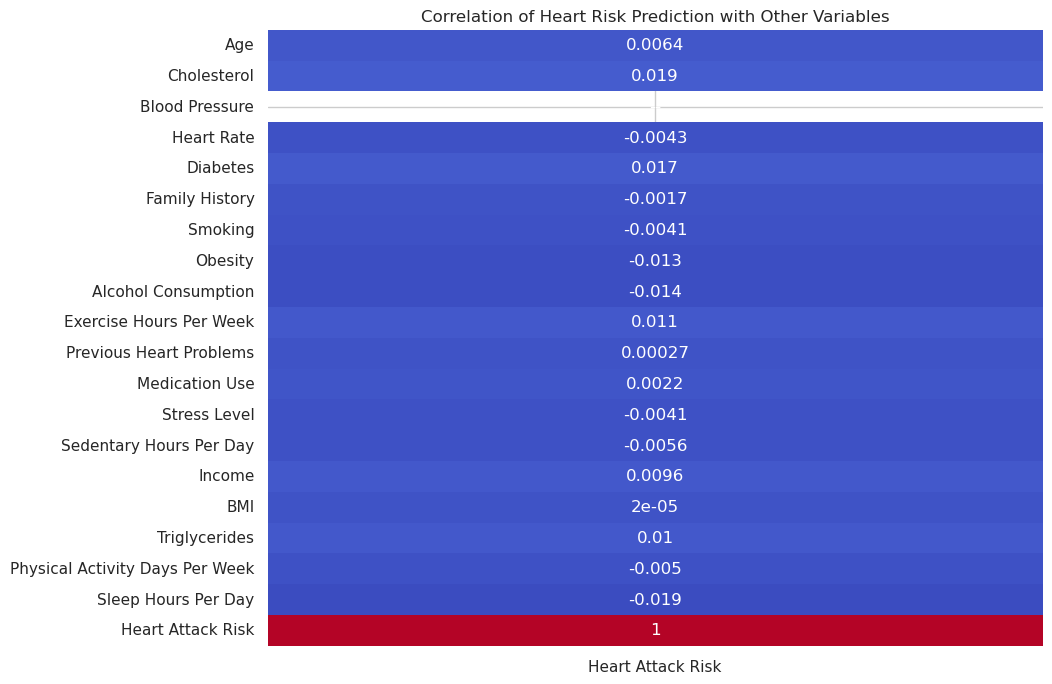

In [58]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix including all variables and heart risk prediction
correlation_matrix = df.corr()

# Filter the correlation of 'heart risk prediction' with all other variables
heart_risk_correlation = correlation_matrix['Heart Attack Risk']

# Plot the correlation of 'heart risk prediction' with all other variables
plt.figure(figsize=(10, 8))
sns.heatmap(heart_risk_correlation.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation of Heart Risk Prediction with Other Variables')
plt.show()



/tmp/ipykernel_207732/2583729682.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_heart_risk = df.corr()['Heart Attack Risk']
/tmp/ipykernel_207732/2583729682.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_heart_risk = df.corr()['Heart Attack Risk']


<Figure size 1000x600 with 0 Axes>

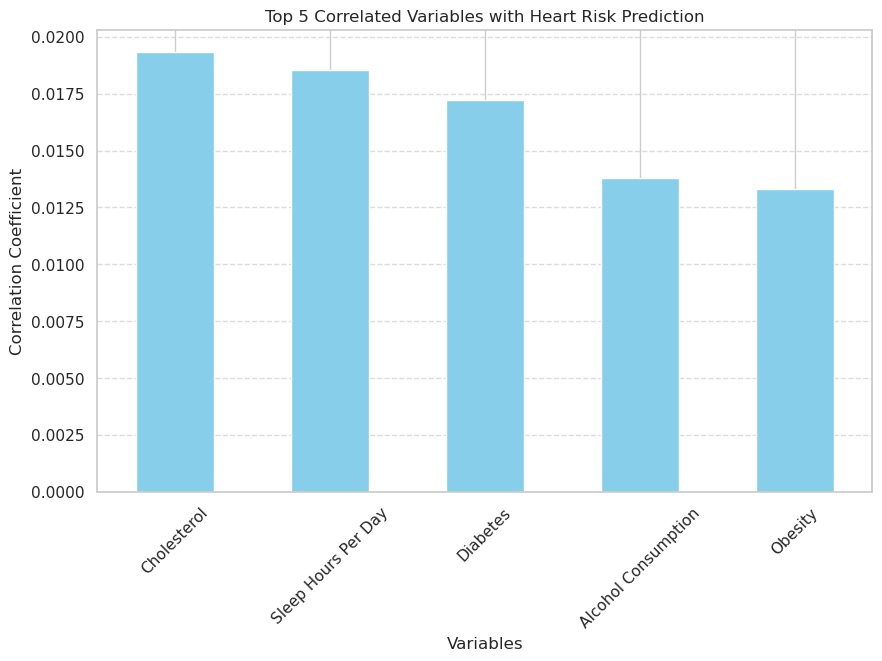

In [61]:
import numpy as np

# Calculate correlation coefficients between 'heart risk prediction' and other variables
correlation_with_heart_risk = df.corr()['Heart Attack Risk']

# Sort the correlation coefficients by their absolute values
sorted_correlation = correlation_with_heart_risk.abs().sort_values(ascending=False)

# Extract top 5 variables (excluding 'heart risk prediction' itself)
top_variables = sorted_correlation[1:6]

# Create a bar plot to visualize the correlation coefficients
plt.figure(figsize=(10, 6))

# Calculate correlation coefficients between 'heart risk prediction' and other variables
correlation_with_heart_risk = df.corr()['Heart Attack Risk']

# Sort the correlation coefficients by their absolute values
sorted_correlation = correlation_with_heart_risk.abs().sort_values(ascending=False)

# Extract top 5 variables (excluding 'heart risk prediction' itself)
top_variables = sorted_correlation[1:6]

# Create a bar plot to visualize the correlation coefficients
plt.figure(figsize=(10, 6))
top_variables.plot(kind='bar', color='skyblue')
plt.title('Top 5 Correlated Variables with Heart Risk Prediction')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



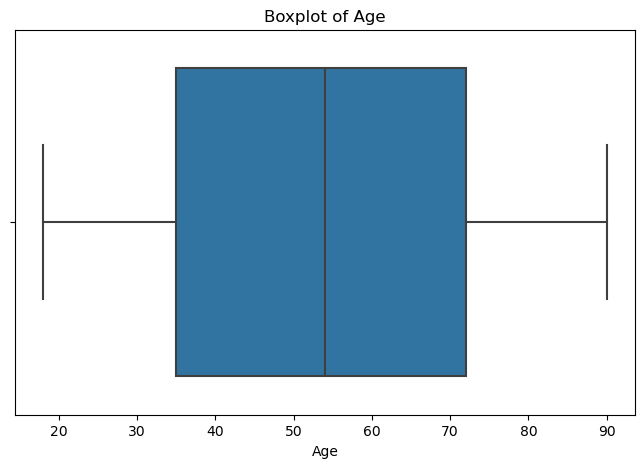

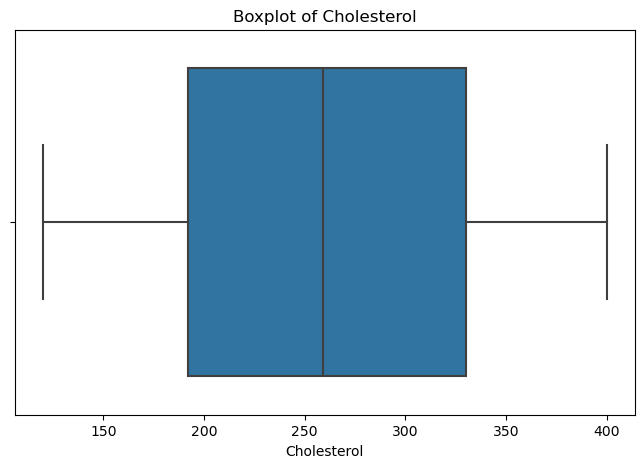

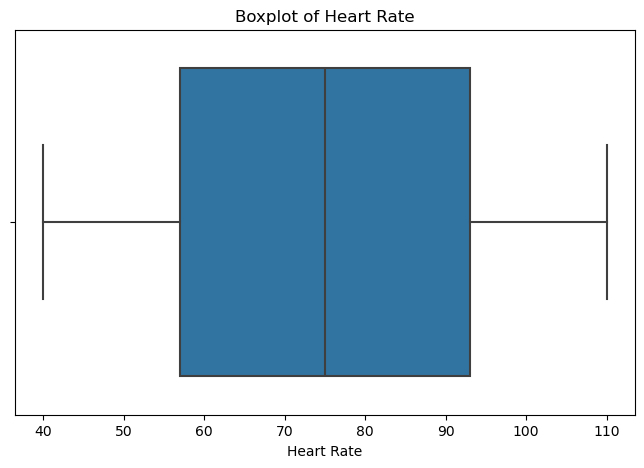

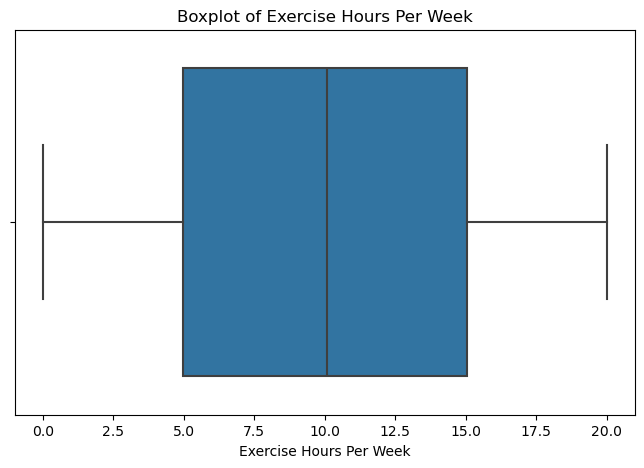

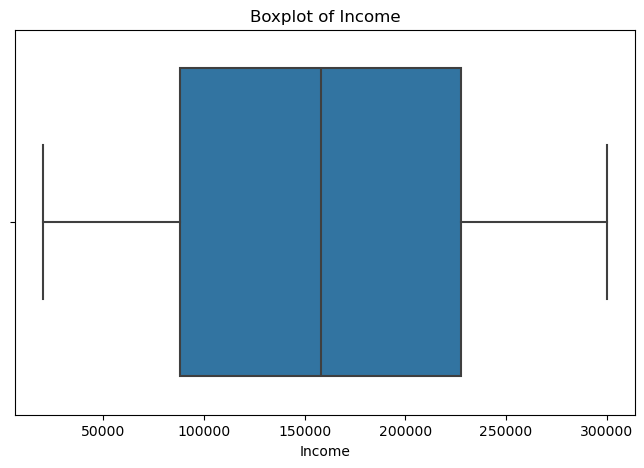

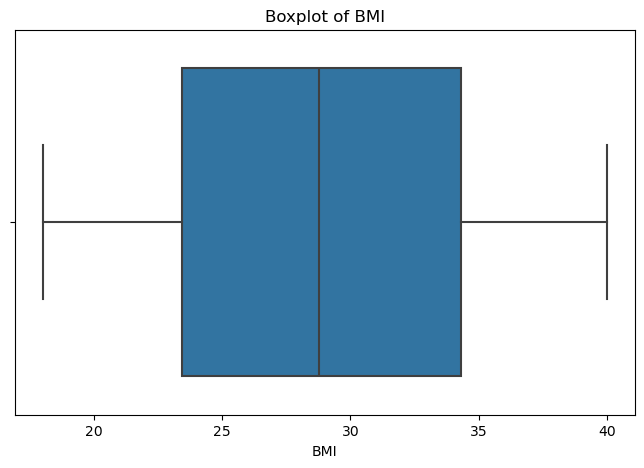

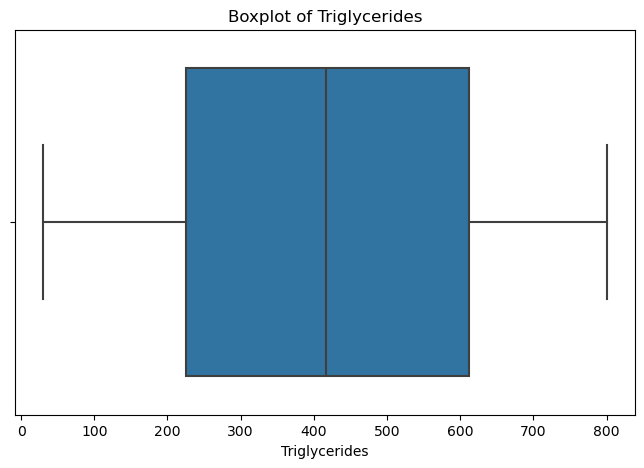

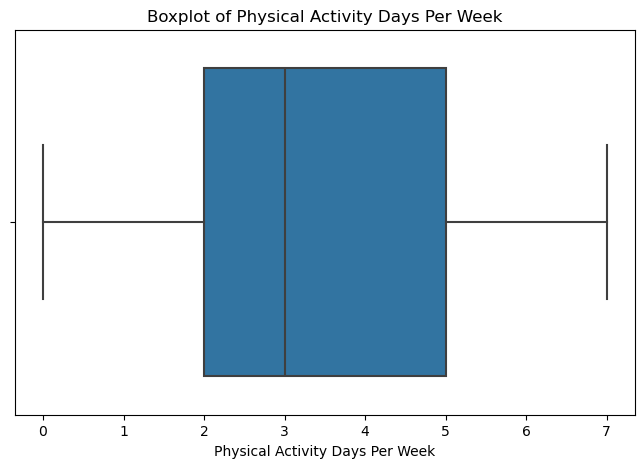

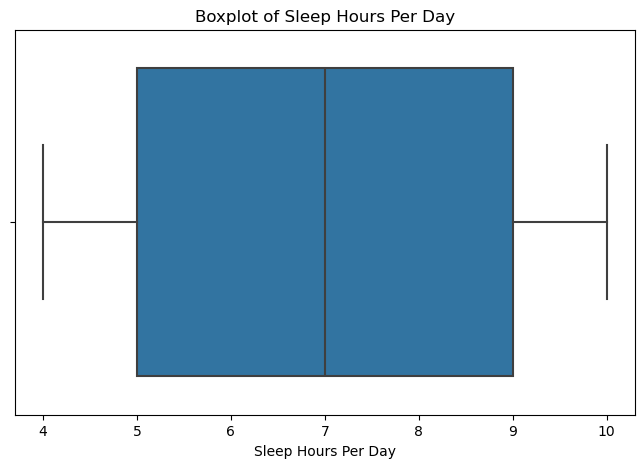

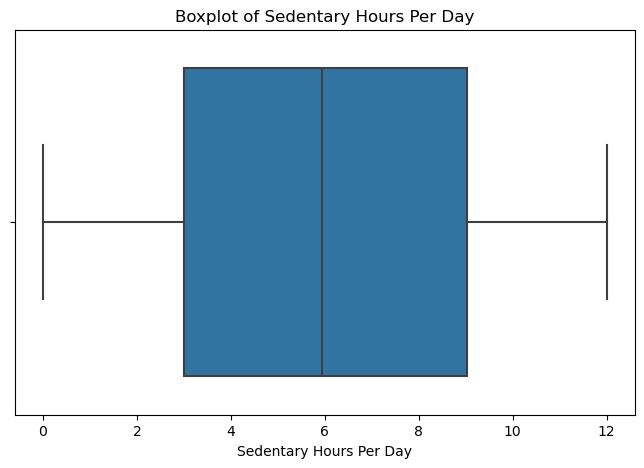

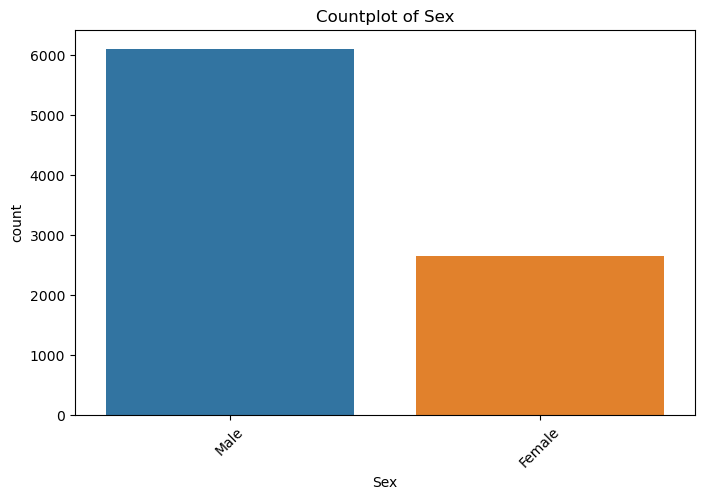

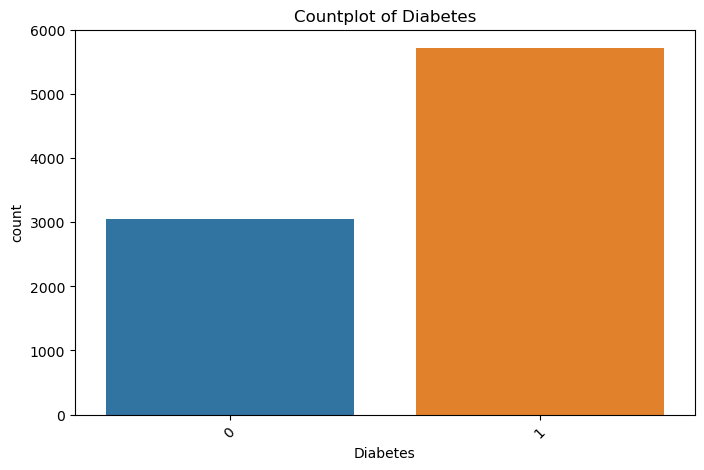

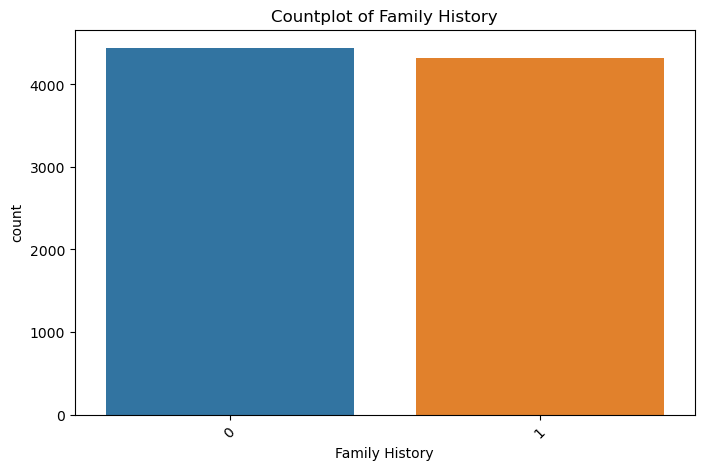

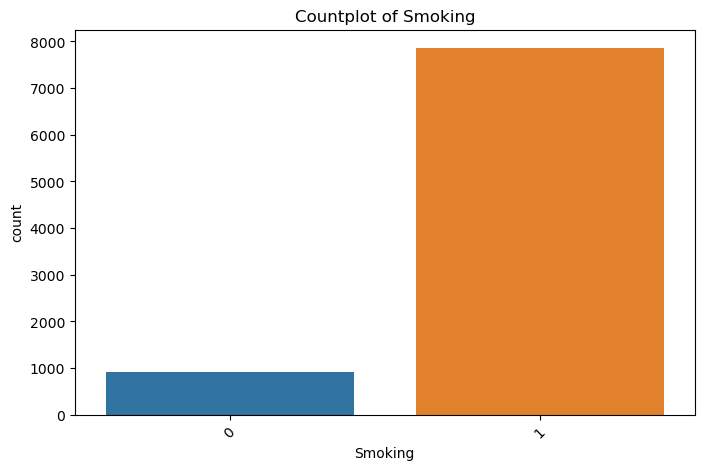

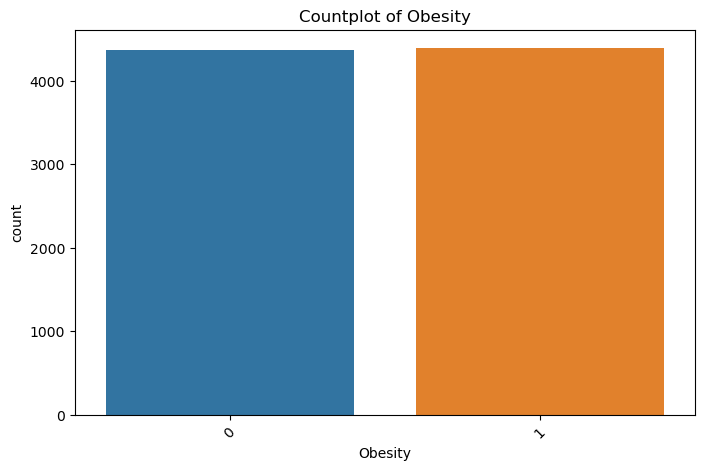

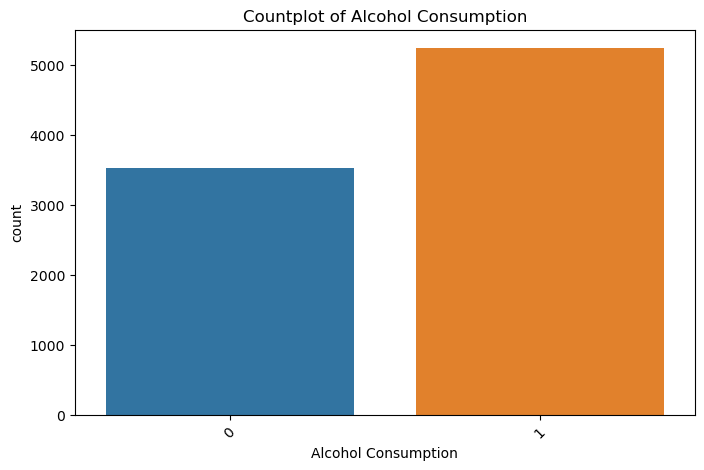

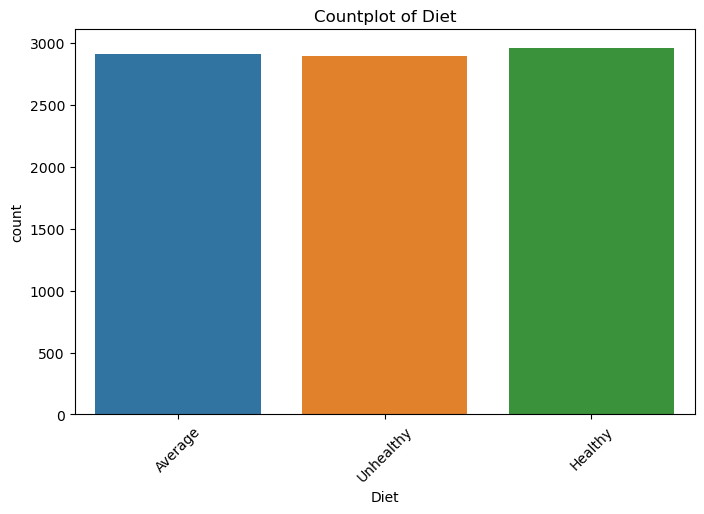

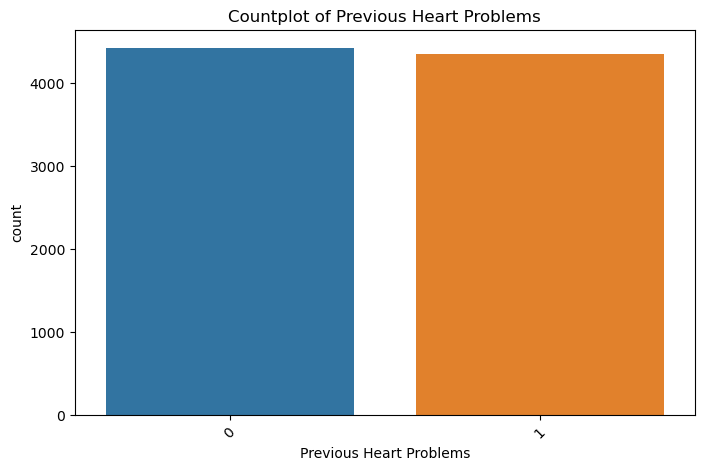

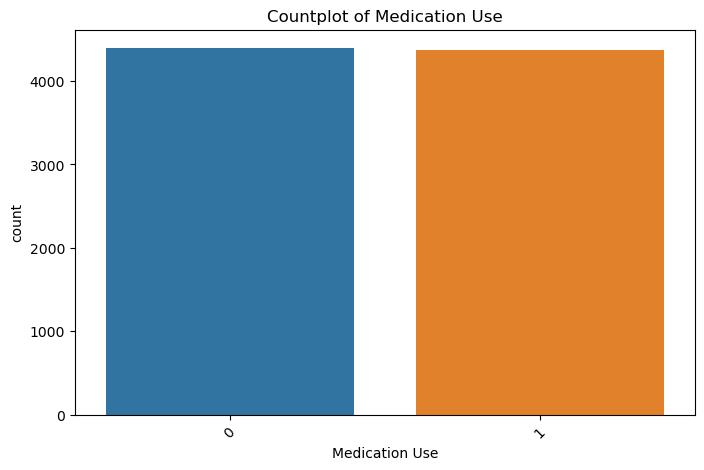

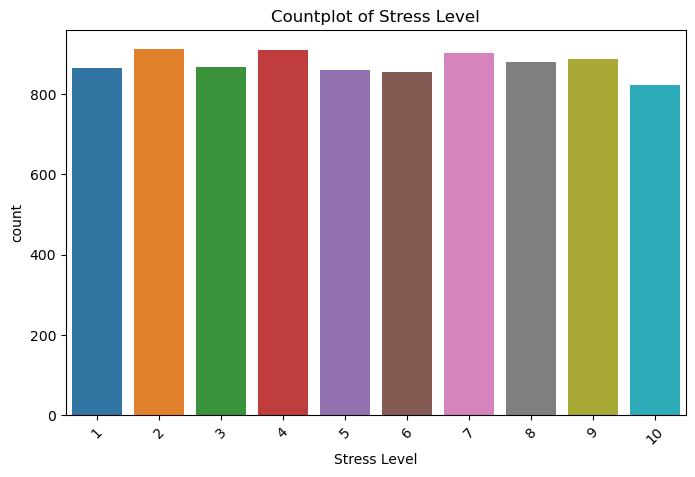

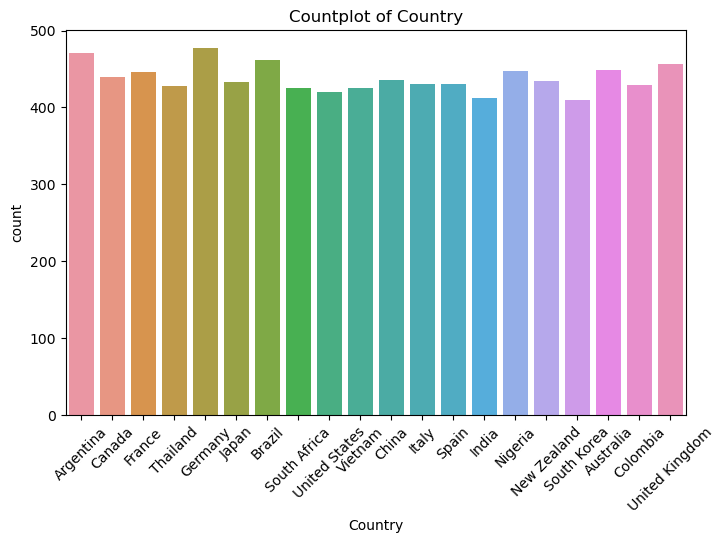

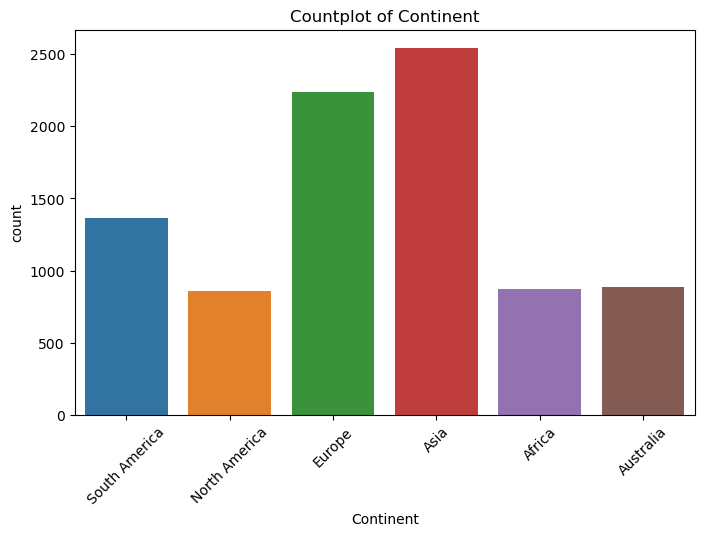

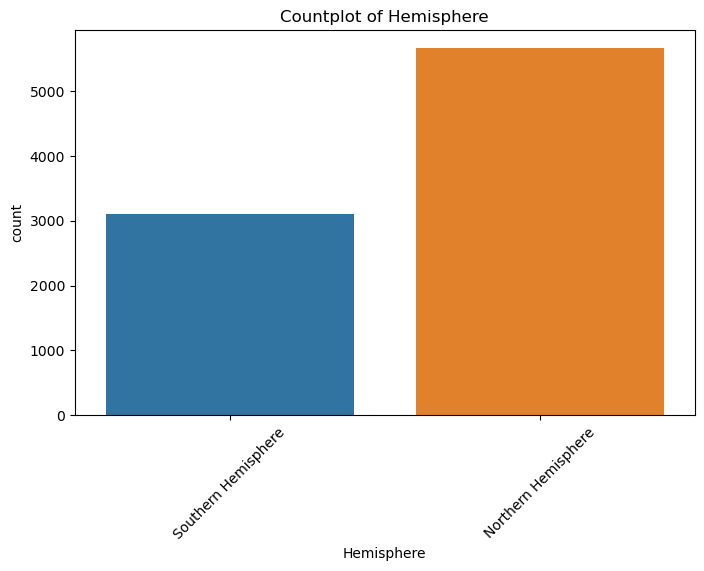

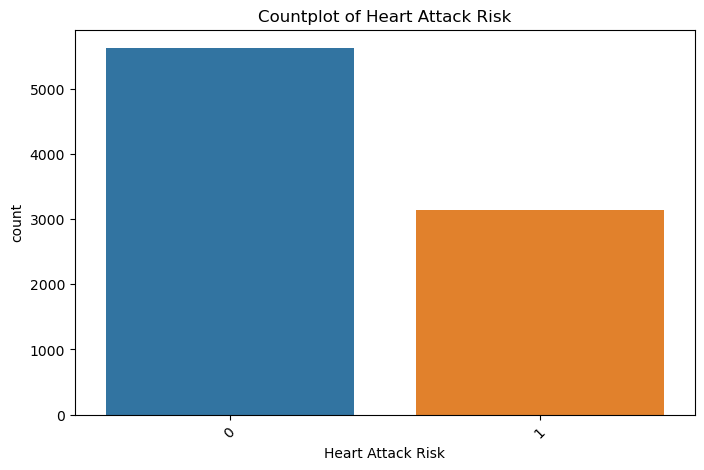

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "~/Downloads/heart_attack_prediction_dataset.csv"
df = pd.read_csv(file_path)

# Numeric columns for analysis
numeric_columns = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Sedentary Hours Per Day']

# Categorical columns for analysis
categorical_columns = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk']

# Analyze each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

# Analyze each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[column])
    plt.title(f"Countplot of {column}")
    plt.xticks(rotation=45)
    plt.show()


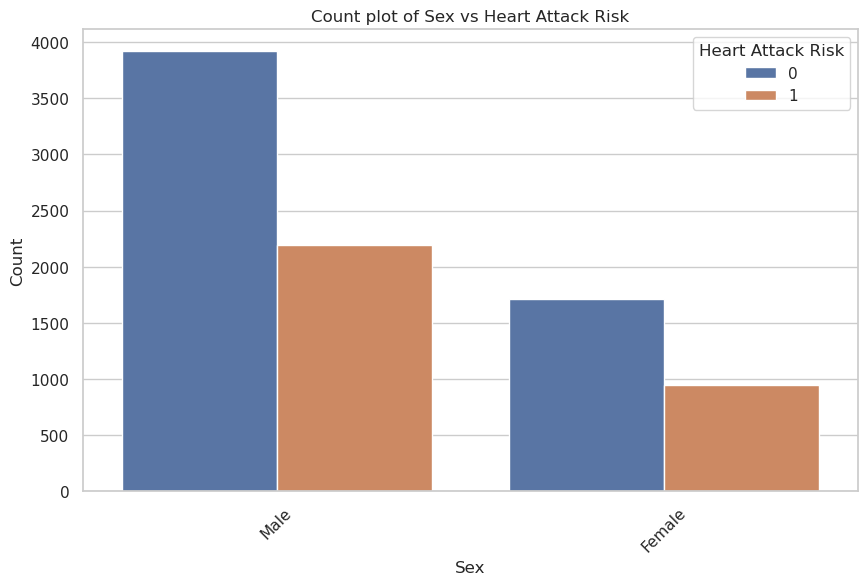

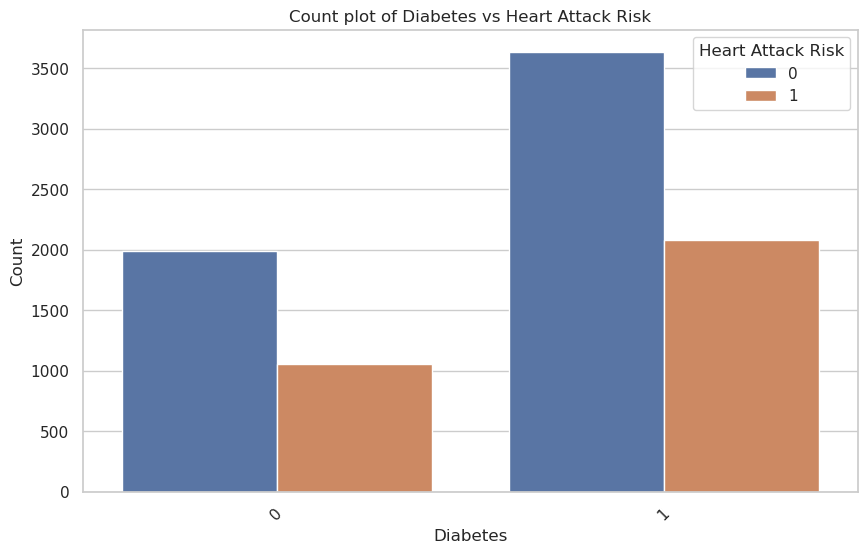

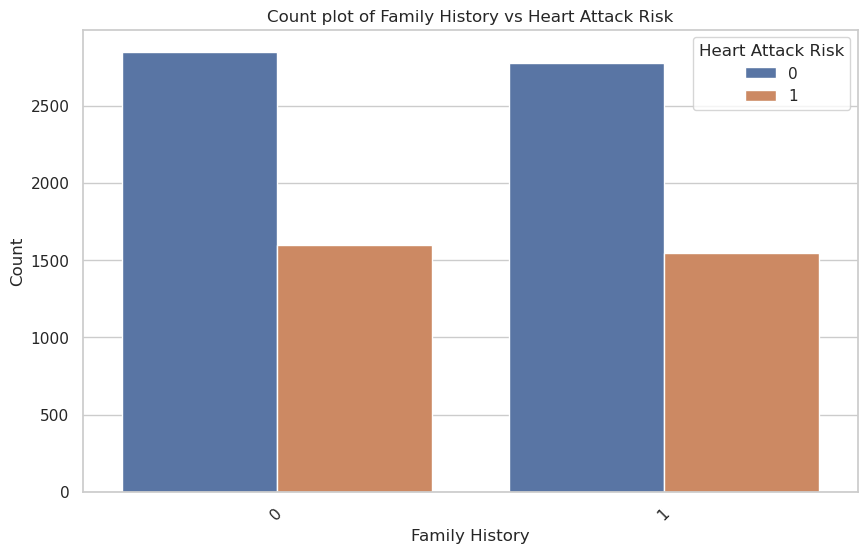

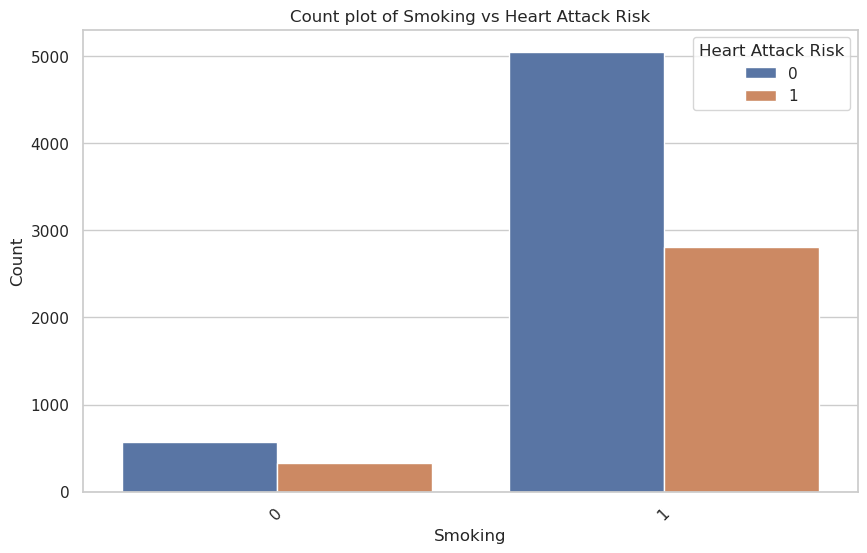

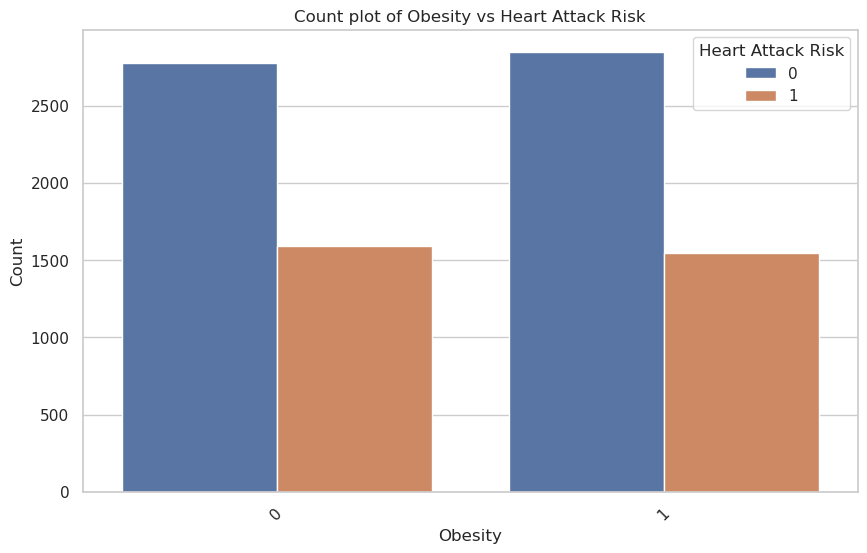

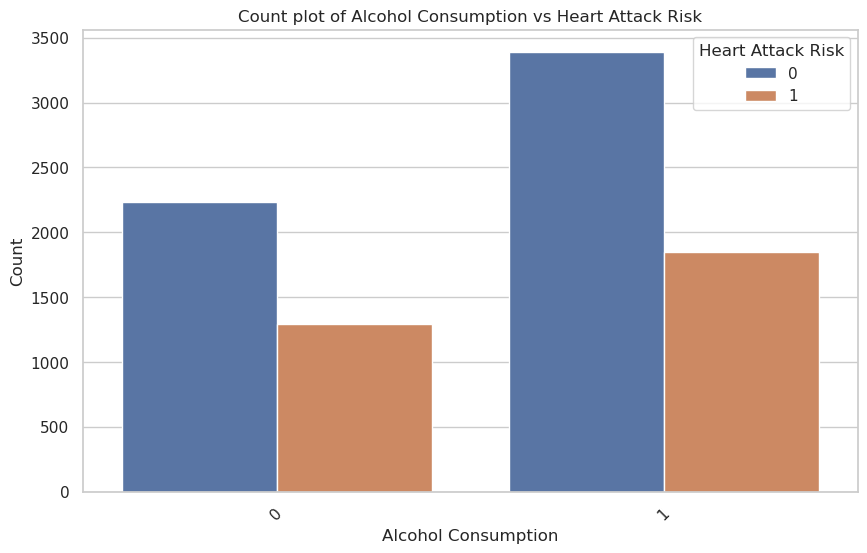

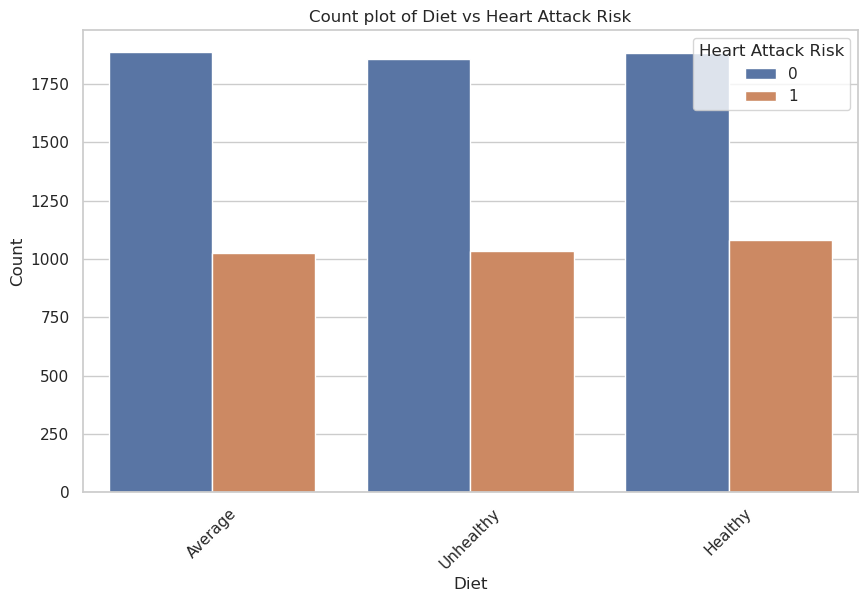

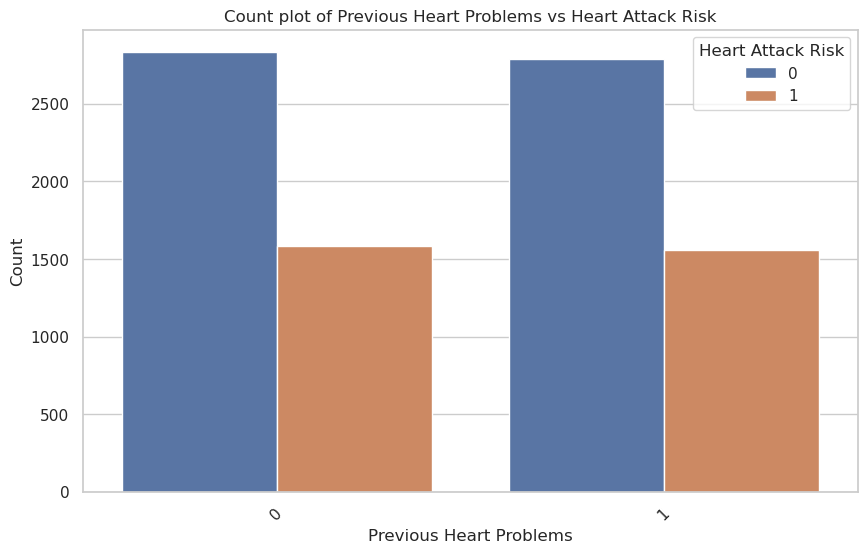

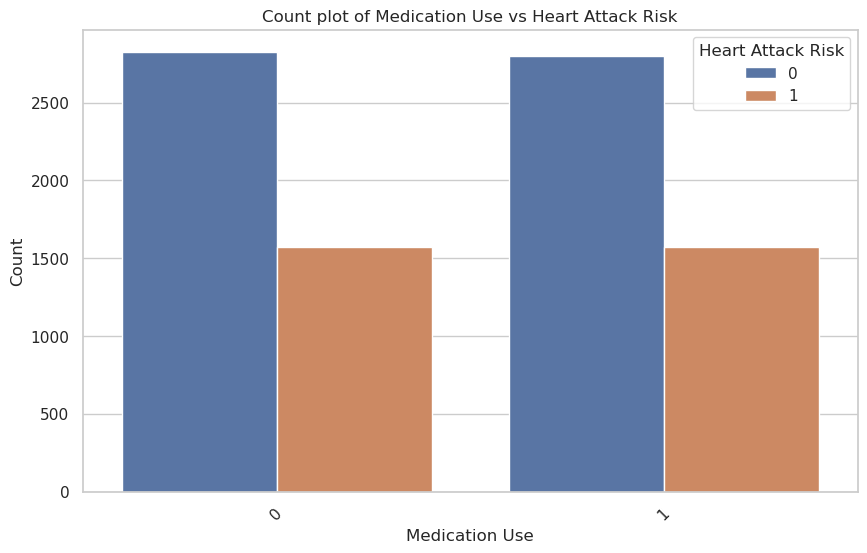

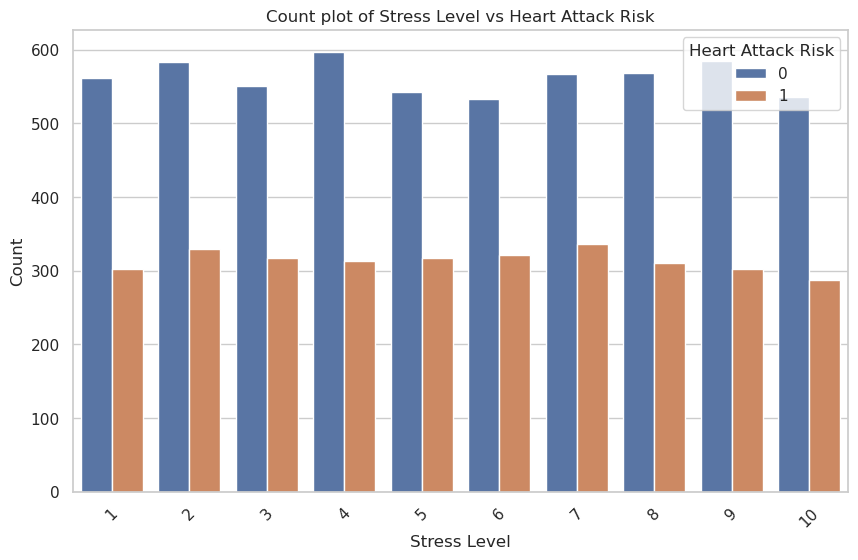

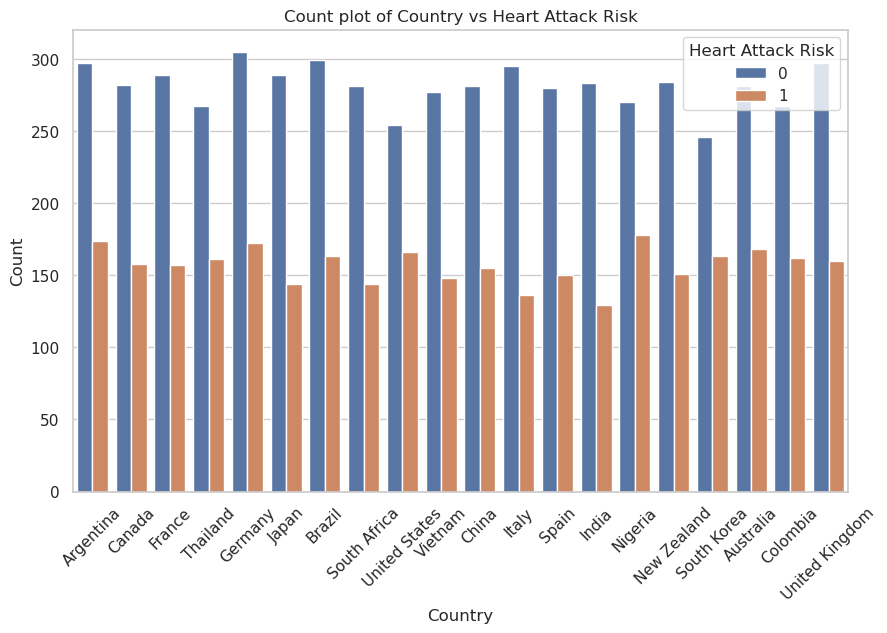

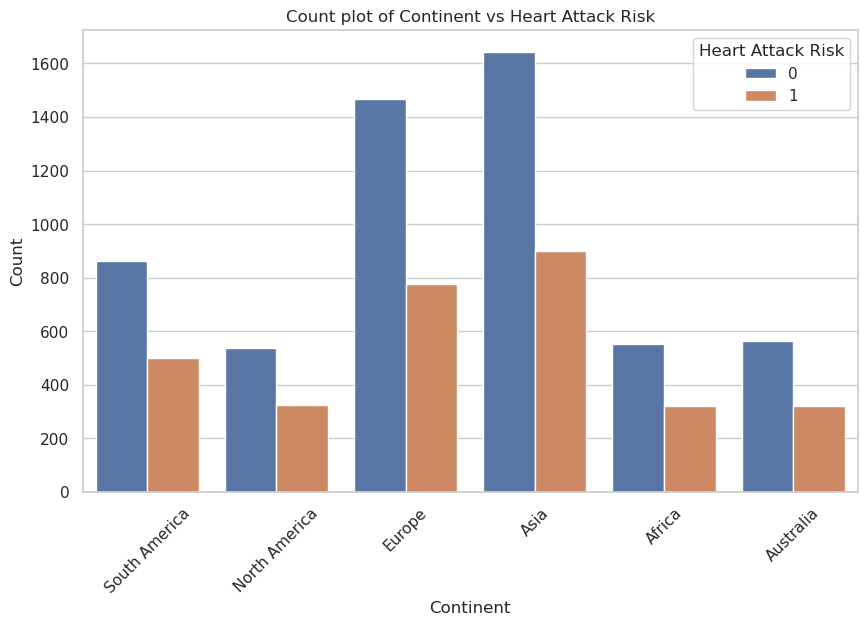

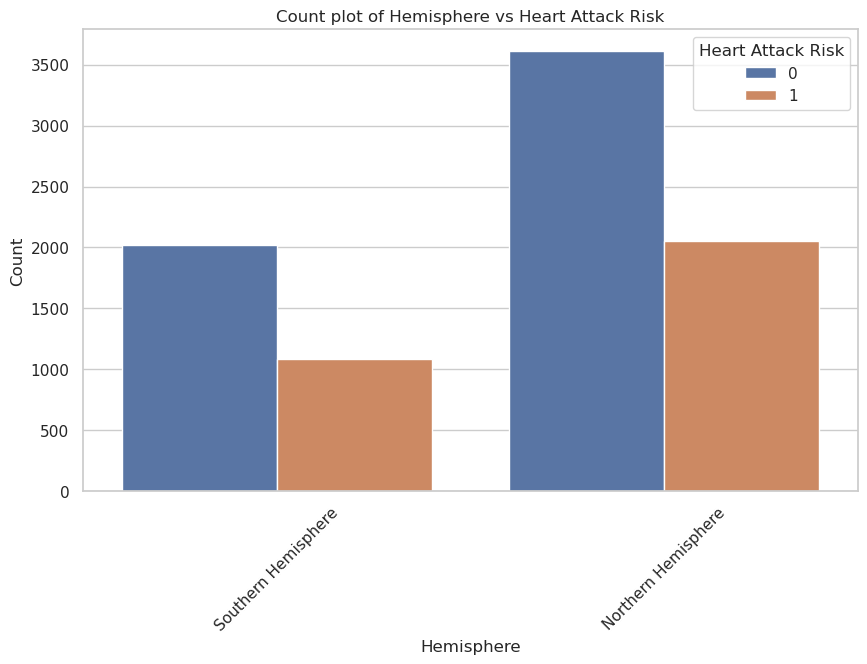

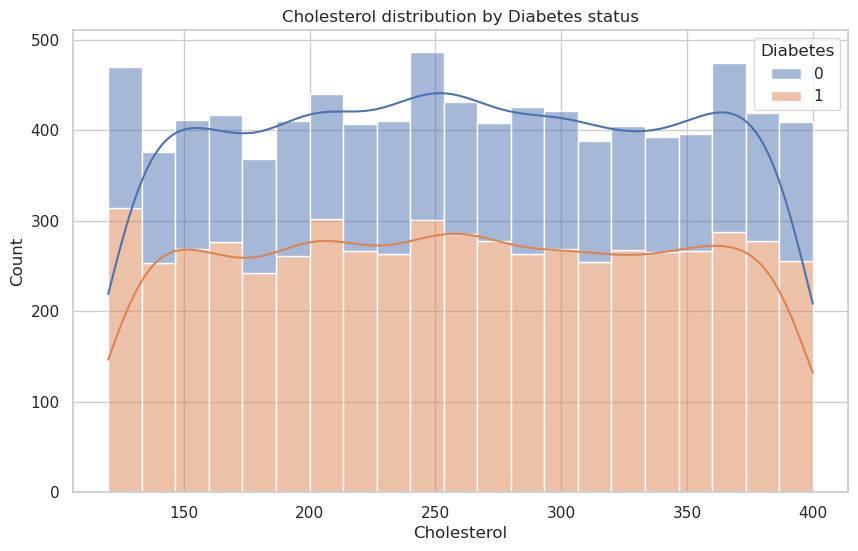

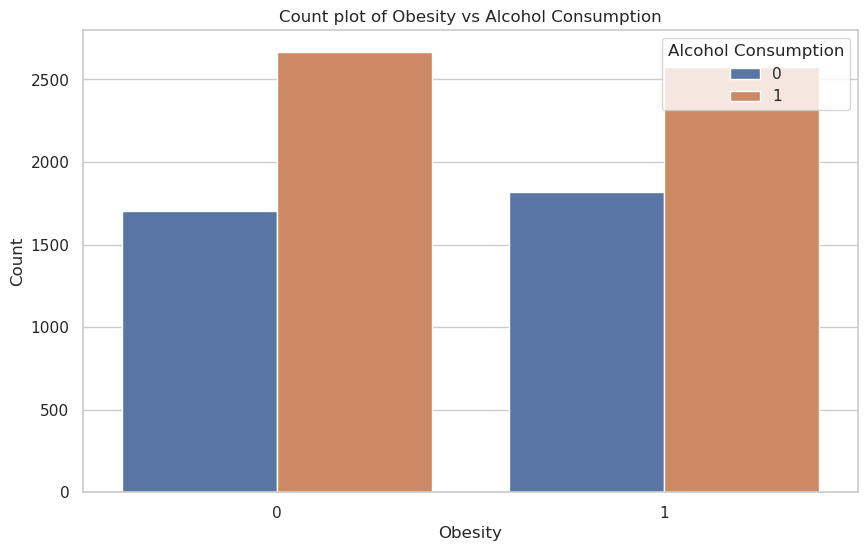

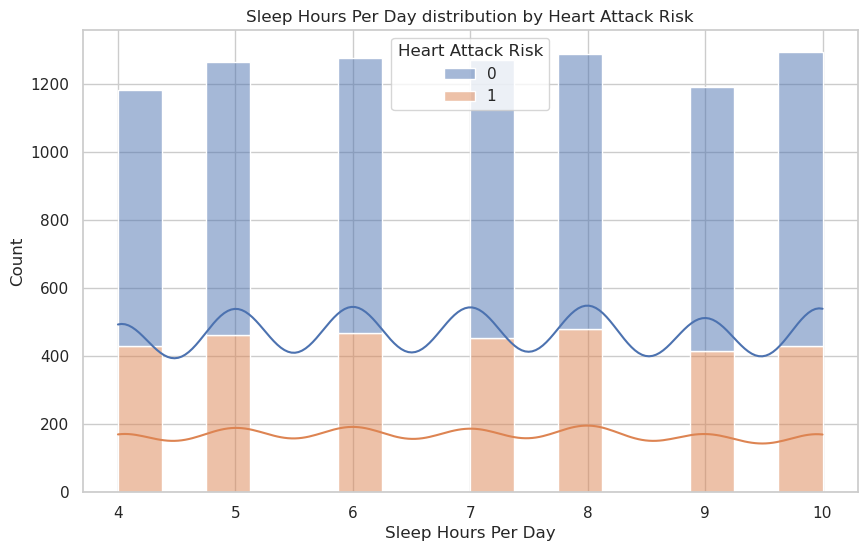

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "~/Downloads/heart_attack_prediction_dataset.csv"
df = pd.read_csv(file_path)

# Numeric variables
numeric_columns = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Income', 'BMI']

# Categorical variables
categorical_columns = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Country', 'Continent', 'Hemisphere']

# Bivariate Analysis

# Bar plots for categorical variables against target variable
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Heart Attack Risk', data=df)
    plt.title(f"Count plot of {column} vs Heart Attack Risk")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Heart Attack Risk")
    plt.show()

# Additional Plots for specified pairs

# Diabetes and Cholesterol
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cholesterol', hue='Diabetes', multiple='stack', kde=True)
plt.title("Cholesterol distribution by Diabetes status")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()

# Obesity and Alcohol Consumption
plt.figure(figsize=(10, 6))
sns.countplot(x='Obesity', hue='Alcohol Consumption', data=df)
plt.title("Count plot of Obesity vs Alcohol Consumption")
plt.xlabel("Obesity")
plt.ylabel("Count")
plt.legend(title="Alcohol Consumption")
plt.show()

# Sleep Hours per Day and Heart Attack Risk
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sleep Hours Per Day', hue='Heart Attack Risk', multiple='stack', kde=True)
plt.title("Sleep Hours Per Day distribution by Heart Attack Risk")
plt.xlabel("Sleep Hours Per Day")
plt.ylabel("Count")
plt.show()


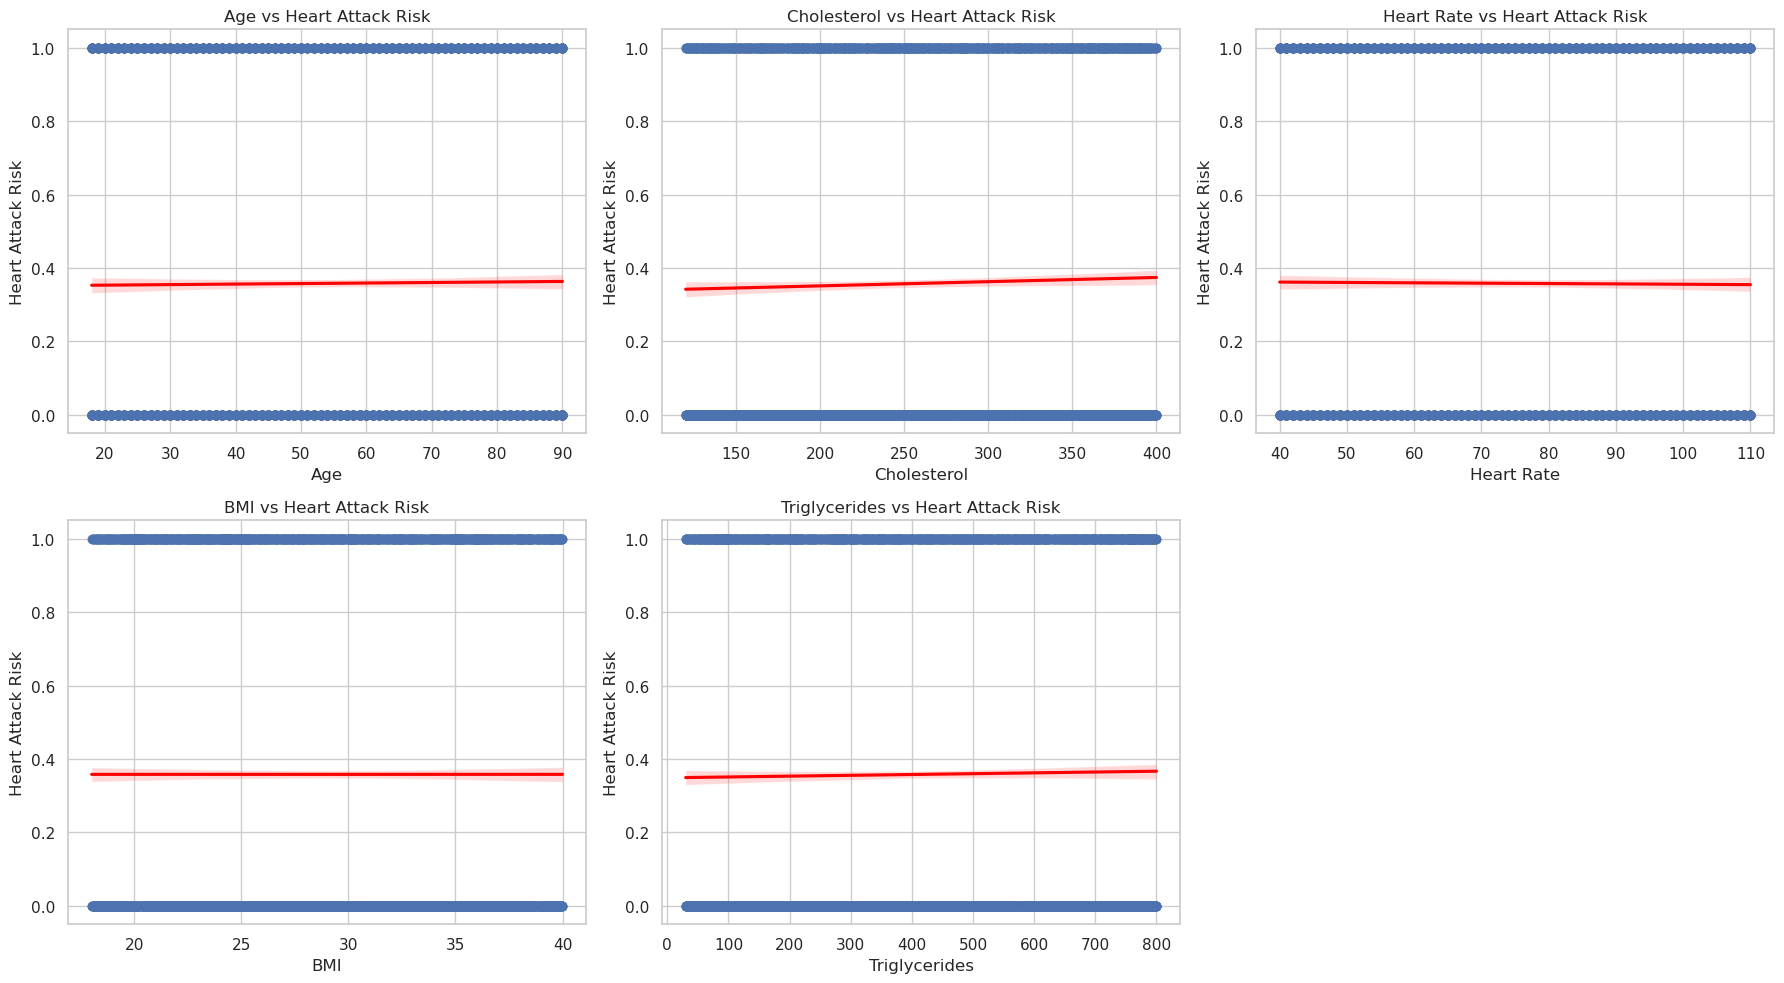

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for analysis
numerical_columns = ['Age', 'Cholesterol', 'Heart Rate', 'BMI', 'Triglycerides']

# Creating scatter plots for each numerical column against Heart Attack Risk
plt.figure(figsize=(18, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=column, y='Heart Attack Risk', data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
    plt.title(f'{column} vs Heart Attack Risk')
    plt.xlabel(column)
    plt.ylabel('Heart Attack Risk')
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('~/Downloads/heart_attack_prediction_dataset.csv')

# Print the first few rows of the dataset to inspect the data
print(df.head())

# Check for non-numeric data in numeric columns
for col in df.columns:
    if df[col].dtype == object:
        print(f"Column '{col}' has non-numeric values:")
        print(df[col].unique())


  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('~/Downloads/heart_attack_prediction_dataset.csv')

# Print the first few rows to inspect the data
print(df.head())

# Identify and clean non-numeric data in numeric columns
for col in df.columns:
    if df[col].dtype == object:
        # Print unique values for columns with object type to inspect them
        print(f"Column '{col}' unique values: {df[col].unique()}")
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            pass

# Fill missing values after conversion
df.fillna(df.mean(), inplace=True)

# Check for columns with all missing values
missing_all = df.columns[df.isna().all()].tolist()
print(f"Columns with all missing values: {missing_all}")

# Drop columns with all missing values
df.drop(columns=missing_all, inplace=True)

# Separate target and features
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Handling non-numeric columns
# Separate features into numeric and categorical
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Remove 'Heart Attack Risk' from features list if still present
if 'Heart Attack Risk' in numeric_features:
    numeric_features.remove('Heart Attack Risk')
if 'Heart Attack Risk' in categorical_features:
    categorical_features.remove('Heart Attack Risk')

# Define the column transformer with an imputer for missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Define the model with increased max_iter and solver
model = LogisticRegression(max_iter=1000, solver='saga')

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Fit the model using RFE for feature selection
rfe = RFE(model, n_features_to_select=1)

# Fit the pipeline
pipeline.fit(X, y)

# Fit RFE
rfe.fit(X, y)

# Get the ranking of features
ranking = rfe.ranking_

# Create a DataFrame for the feature ranking
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': ranking
})

# Sort the DataFrame by ranking
feature_ranking.sort_values(by='Ranking', inplace=True)

# Display the ranking of features
print(feature_ranking)


  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

/home/moaz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/moaz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/moaz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/moaz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                            Feature  Ranking
3                          Diabetes        1
7               Alcohol Consumption        2
6                           Obesity        3
5                           Smoking        4
17              Sleep Hours Per Day        5
10                   Medication Use        6
4                    Family History        7
16  Physical Activity Days Per Week        8
8           Exercise Hours Per Week        9
12          Sedentary Hours Per Day       10
11                     Stress Level       11
9           Previous Heart Problems       12
0                               Age       13
2                        Heart Rate       14
14                              BMI       15
1                       Cholesterol       16
15                    Triglycerides       17
13                           Income       18


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

# Print results
results_df = pd.DataFrame(results).T
print(results_df)


/home/moaz/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.641757   0.411852  0.641757  0.501721
Random Forest        0.636052   0.555936  0.636052  0.518111
SVM                  0.641187   0.531239  0.641187  0.502487


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Define models to try
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC()
}

# Select top 5 features based on ranking
top_features = feature_ranking['Feature'][:5].tolist()

# Train models on different combinations of top 5 features
for i in range(1, len(top_features) + 1):
    selected_features = top_features[:i]
    X_selected = X[selected_features]
    
    # Print selected features
    print(f"Selected Features: {selected_features}")
    
    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_selected, y)
        # Evaluate model performance (optional)
        # Example: cross-validation
        # Print model performance metrics
        print(f"Model: {name} - Trained on: {i} features - Accuracy: {model.score(X_selected, y)}")


Selected Features: ['Diabetes']
Model: Logistic Regression - Trained on: 1 features - Accuracy: 0.6417893415496976
Model: Random Forest - Trained on: 1 features - Accuracy: 0.6417893415496976
Model: Support Vector Machine - Trained on: 1 features - Accuracy: 0.6417893415496976
Model: K-Nearest Neighbors - Trained on: 1 features - Accuracy: 0.6417893415496976
Model: SVM - Trained on: 1 features - Accuracy: 0.6417893415496976
Selected Features: ['Diabetes', 'Alcohol Consumption']
Model: Logistic Regression - Trained on: 2 features - Accuracy: 0.6417893415496976
Model: Random Forest - Trained on: 2 features - Accuracy: 0.6417893415496976
Model: Support Vector Machine - Trained on: 2 features - Accuracy: 0.6417893415496976
Model: K-Nearest Neighbors - Trained on: 2 features - Accuracy: 0.6417893415496976
Model: SVM - Trained on: 2 features - Accuracy: 0.6417893415496976
Selected Features: ['Diabetes', 'Alcohol Consumption', 'Obesity']
Model: Logistic Regression - Trained on: 3 features - A